<a href="https://colab.research.google.com/github/Palomamozer/investigate-a-dataset/blob/main/project_Investigate_a_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [ ]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
faixas_etarias = np.arange(0, df['Age'].max()+1, 15)
df['age_range'] = pd.cut(df['Age'], faixas_etarias)
df['No-show'] = df['No-show'].replace('No','Compareceu')
df['No-show'] = df['No-show'].replace('Yes','Não compareceu')
df = df.drop_duplicates()
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['day_of_week'] = df['AppointmentDay'].dt.day_name()
df['Handcap'] = df['Handcap'].replace(2,0)
df['Handcap'] = df['Handcap'].replace(3,0)
df['Handcap'] = df['Handcap'].replace(4,0)

df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_range,day_of_week
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Compareceu,"(60, 75]",Friday
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Compareceu,"(45, 60]",Friday
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Compareceu,"(60, 75]",Friday
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Compareceu,"(0, 15]",Friday
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Compareceu,"(45, 60]",Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,Compareceu,"(45, 60]",Tuesday
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,Compareceu,"(45, 60]",Tuesday
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,Compareceu,"(15, 30]",Tuesday
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,Compareceu,"(30, 45]",Tuesday


In [ ]:
no_show_appointments = df[df['No-show']=='Não compareceu']

show_appointments = df[df['No-show']=='Compareceu']

<Axes: ylabel='count'>

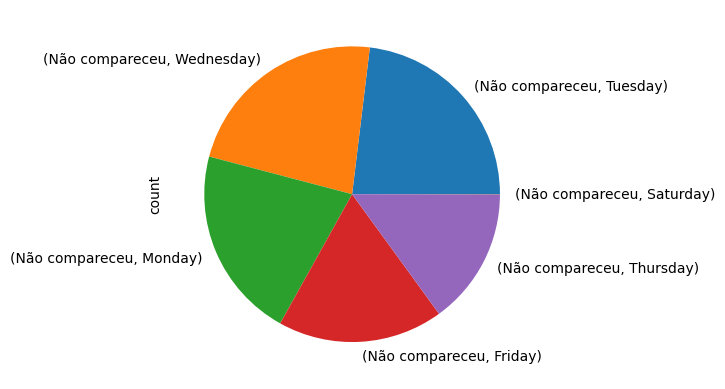

In [ ]:
day_vs_noshow = no_show_appointments[['No-show','day_of_week']].value_counts()
day_vs_noshow.plot(kind='pie')

# The patients are more likely not to attend an appointment if it is on a Tuesday.

<Axes: ylabel='count'>

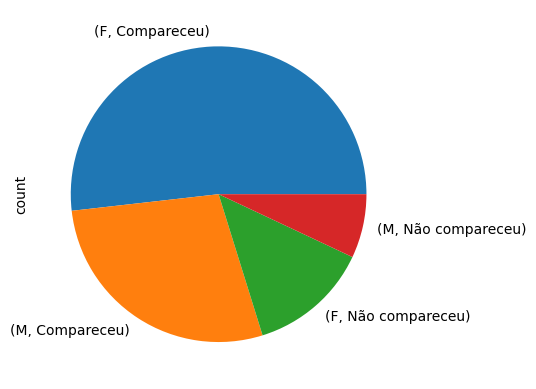

In [ ]:
gender_vs_show = df[['Gender','No-show']].value_counts()
gender_vs_show.plot(kind='pie')

In [ ]:
gender_vs_show

,,count
Gender,No-show,
F,Compareceu,57246
M,Compareceu,30962
F,Não compareceu,14594
M,Não compareceu,7725


# Of the 71,840 women who scheduled an appointment, about 20.3% of them did not attend, and of the 38,687 men with appointments scheduled, about 19.9% did not attend. We can say that women have a slightly higher chance of not attending the appointment.

<Axes: title={'center': 'Man vs no show per age range'}, xlabel='age_range,Gender'>

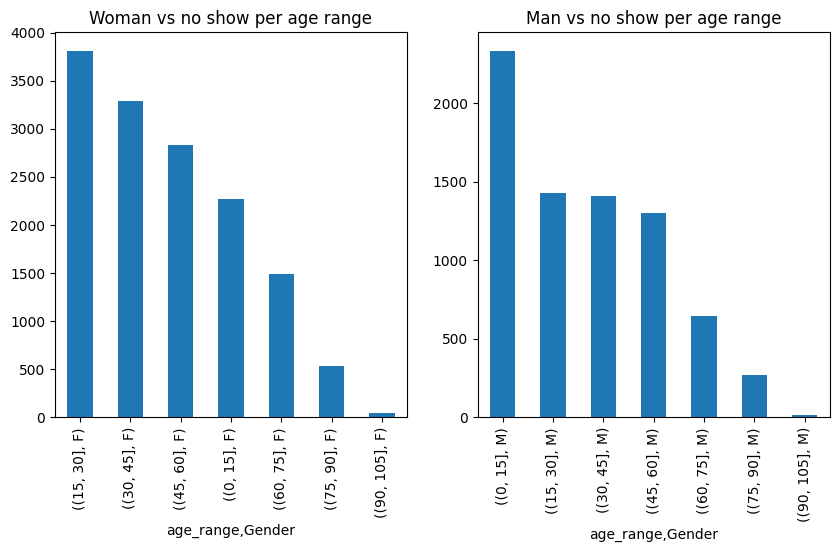

In [ ]:
woman_show = show_appointments[show_appointments['Gender']=='F']
woman_noshow = no_show_appointments[no_show_appointments['Gender']=='F']
man_show = show_appointments[show_appointments['Gender']=='M']
man_noshow = no_show_appointments[no_show_appointments['Gender']=='M']

fig, axes = plt.subplots(nrows=1, ncols=2)

woman_noshow[['age_range','Gender']].value_counts().plot(kind='bar',ax=axes[0], figsize=(10,5), title='Woman vs no show per age range')
man_noshow[['age_range','Gender']].value_counts().plot(kind='bar',ax=axes[1],title='Man vs no show per age range')

# Women between 15-30 years old and men between 0-15 years old attend fewer appointments.





<Axes: xlabel='age_range,No-show'>

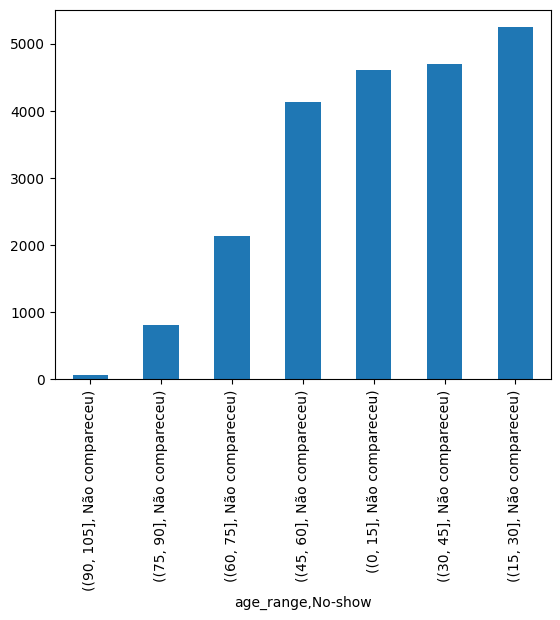

In [ ]:
age_vs_noshow = no_show_appointments[['age_range','No-show']].value_counts().sort_values()
age_vs_noshow.plot(x='age_range',y='No-show',kind='bar')

# In general, people between 15-45 years old attend fewer appointments.

<Axes: xlabel='SMS_received,No-show'>

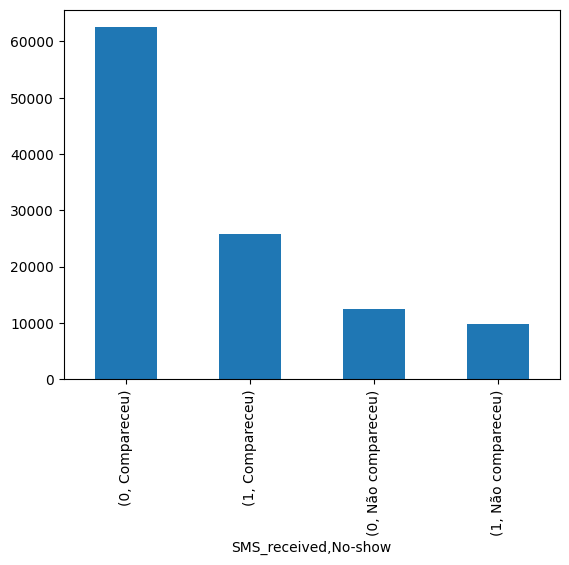

In [ ]:
sms_received = df[['SMS_received','No-show']].value_counts()
sms_received.plot(kind='bar')

# This bar chart shows that a large portion of the people who attended the appointment did not receive the SMS.


In [ ]:
sms_received

,,count
SMS_received,No-show,
0,Compareceu,62510
1,Compareceu,25698
0,Não compareceu,12535
1,Não compareceu,9784


# The percentage of people who did not receive the SMS and did not attend is 16.7%, while the percentage of those who received the SMS and did not attend is 27.5%. In other words, patients are more likely to attend the appointment if they do not receive the SMS.

<Axes: xlabel='Scholarship,No-show'>

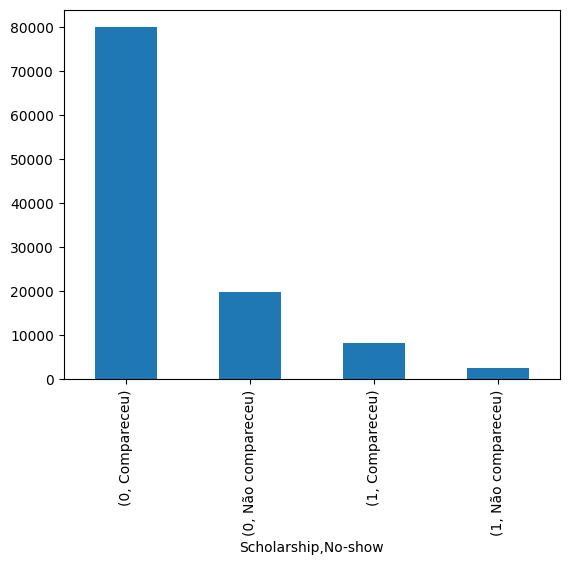

In [ ]:
scholarship_show = df[['Scholarship','No-show']].value_counts()
scholarship_show.plot(kind='bar')

# From this chart, we can see that the majority of people who attend the appointment do not have scholarship. Additionally, about 1/4 of those who have scholarship do not attend.

In [ ]:
scholarship_show

Scholarship  No-show       
0            Compareceu        79925
             Não compareceu    19741
1            Compareceu         8283
             Não compareceu     2578
Name: count, dtype: int64

# Since the majority of patients do not have scholarship, this variable doesn't help much in predicting who will or will not attend the appointment.

<Axes: xlabel='Hipertension,Diabetes,Alcoholism'>

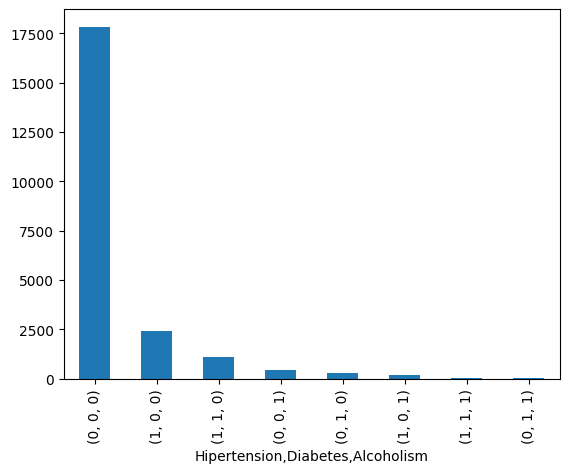

In [ ]:
disease_noshow = no_show_appointments[['Hipertension','Diabetes','Alcoholism']].value_counts()
disease_noshow.plot(kind='bar')

# From this chart, we can observe that most of the people who do not attend the appointments do not have any illness. Therefore, we can conclude that these variables are important in predicting whether a person will attend the appointment or not.

<Axes: ylabel='count'>

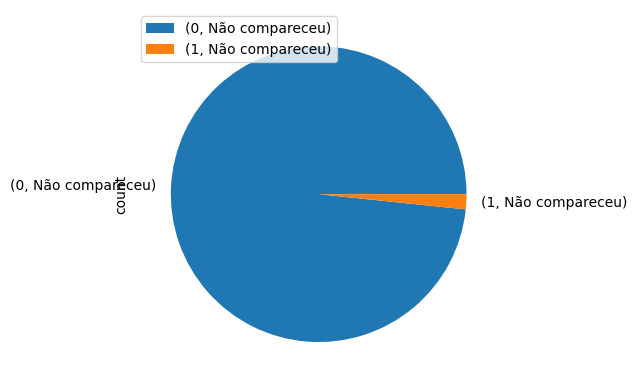

In [ ]:
handcap_noshow = no_show_appointments[['Handcap','No-show']].value_counts()
handcap_noshow.plot(kind= 'pie', legend=True)

# Patients who do not have any disabilities are more likely to miss their scheduled appointment.

# **Conclusion**
# Based on this analysis, we can identify several variables that help us predict whether a person will attend their appointment or not. These are:

# - Days of the week
# - Age and gender
# - SMS receipt
# - Illnesses
# - Disabilities

# All of these variables help us understand why some patients do not attend their appointments and guide us in considering what can be done to reduce the occurrence of cancellations.